In [4]:
import pandas as pd
import pandas_datareader.data as reader
import datetime as dt
import statsmodels.api as sm
import matplotlib.pyplot as plt
import getFamaFrenchFactors as gff
import seaborn as sns

In [5]:
end = dt.datetime.now()
start = dt.date(end.year - 3,end.month,end.day)
ticker = ['1810.HK']

In [6]:
stock_prices = reader.get_data_yahoo(ticker, start, end)['Adj Close']
stock_prices.head()

Symbols,1810.HK
Date,
2018-11-28,14.50
2018-11-29,14.20
2018-11-30,14.28
2018-12-03,14.86
2018-12-04,14.64


In [7]:
stock_prices = stock_prices.resample('1M').last()
stock_prices.head()

Symbols,1810.HK
Date,
2018-11-30,14.28
2018-12-31,12.92
2019-01-31,9.84
2019-02-28,11.96
2019-03-31,11.38


In [8]:
stock_returns = stock_prices.pct_change()
stock_returns = stock_returns.dropna()
stock_returns.head()

Symbols,1810.HK
Date,
2018-12-31,-0.095238
2019-01-31,-0.238390
2019-02-28,0.215447
2019-03-31,-0.048495
2019-04-30,0.056239


In [9]:
ff3_monthly = pd.DataFrame(gff.famaFrench3Factor(frequency='m'))
ff3_monthly.rename(columns={'date_ff_factors':'Date'}, inplace=True)
ff3_monthly.set_index('Date', inplace = True)
ff3_monthly

,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07-31,0.0296,-0.0238,-0.0273,0.0022
1926-08-31,0.0264,-0.0147,0.0414,0.0025
1926-09-30,0.0036,-0.0139,0.0012,0.0023
1926-10-31,-0.0324,-0.0013,0.0065,0.0032
1926-11-30,0.0253,-0.0016,-0.0038,0.0031
...,...,...,...,...
2021-06-30,0.0275,0.0180,-0.0776,0.0000
2021-07-31,0.0127,-0.0396,-0.0175,0.0000
2021-08-31,0.0290,-0.0048,-0.0013,0.0000


In [10]:
market_premium = ff3_monthly['Mkt-RF'].mean()
size_premium = ff3_monthly['SMB'].mean()
value_premium = ff3_monthly['HML'].mean()
print(market_premium, size_premium, value_premium)

0.006931905594405599 0.0020048076923076938 0.003346678321678321


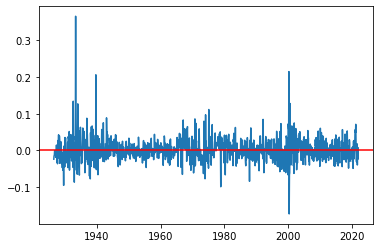

In [11]:
plt.plot(ff3_monthly['SMB'])
plt.axhline(0,color='red')

In [12]:
stock_returns.rename(columns={'1810.HK':'Xiaomi'}, inplace=True)
data = ff3_monthly.merge(stock_returns, on = 'Date')
data.head()

,Mkt-RF,SMB,HML,RF,Xiaomi
Date,,,,,
2018-12-31,-0.0955,-0.0242,-0.0190,0.0019,-0.095238
2019-01-31,0.0841,0.0290,-0.0044,0.0021,-0.238390
2019-02-28,0.0340,0.0204,-0.0268,0.0018,0.215447
2019-03-31,0.0110,-0.0298,-0.0405,0.0019,-0.048495
2019-04-30,0.0396,-0.0174,0.0217,0.0021,0.056239


In [13]:
XIAOMI_excess_ret = data['Xiaomi'] - data['RF']
data['Xiaomi - RF'] = XIAOMI_excess_ret
data.head()

,Mkt-RF,SMB,HML,RF,Xiaomi,Xiaomi - RF
Date,,,,,,
2018-12-31,-0.0955,-0.0242,-0.0190,0.0019,-0.095238,-0.097138
2019-01-31,0.0841,0.0290,-0.0044,0.0021,-0.238390,-0.240490
2019-02-28,0.0340,0.0204,-0.0268,0.0018,0.215447,0.213647
2019-03-31,0.0110,-0.0298,-0.0405,0.0019,-0.048495,-0.050395
2019-04-30,0.0396,-0.0174,0.0217,0.0021,0.056239,0.054139


<AxesSubplot:xlabel='Mkt-RF', ylabel='Xiaomi - RF'>

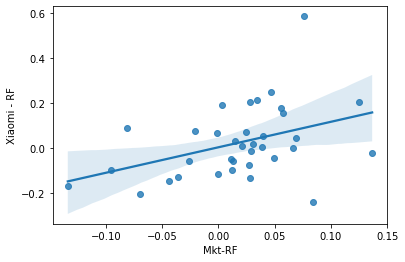

In [14]:
sns.regplot(x = 'Mkt-RF', y='Xiaomi - RF', data = data)

In [19]:
X = data[['Mkt-RF', 'SMB', 'HML']]
y = data['Xiaomi - RF']

X1 = sm.add_constant(X)
model = sm.OLS(y,X1)

results = model.fit()
results.summary()

C:\Users\thieb\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Xiaomi - RF   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     2.106
Date:                Sun, 28 Nov 2021   Prob (F-statistic):              0.120
Time:                        20:09:36   Log-Likelihood:                 18.209
No. Observations:                  35   AIC:                            -28.42
Df Residuals:                      31   BIC:                            -22.20
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.806e-05      0.028      0.003      0.998      -0.057       0.057
Mkt-RF         1.1124      0.504      2.208      0.035       0.085       2.140
SMB            0.4259      1.017      0.419      0.678      -1.648       2.500
HML           -0.2473      0.625     -0.396      0.695      -1.521       1.027
==============================================================================
Omnibus:                       11.055   Durbin-Watson:                   2.237
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               13.416
Skew:                           0.838   Prob(JB):                      0.00122
Kurtosis:                       5.527   Cond. No.                         40.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
intercept, beta_m, beta_s, beta_v = results.params
print(beta_m, beta_s, beta_v)

1.1124284127819162 0.425939043863503 -0.24725633406198907


In [22]:
risk_free = data['RF'].mean()
risk_free

0.0007885714285714284

In [23]:
xiaomi_exp_return = risk_free + beta_m*market_premium
xiaomi_exp_return = xiaomi_exp_return * 12
xiaomi_exp_return

0.1019978419981216

In [25]:
xiaomi_exp_return = risk_free + beta_m*market_premium + beta_s*size_premium+beta_v*value_premium
xiaomi_exp_return = xiaomi_exp_return * 12
xiaomi_exp_return

0.10231510349998749